# Project 12 - Social Networks and Recommendation Systems

In [1]:
import pandas as pd, networkx as nx, numpy as np

#### P12.1 Import tweeter data. Draw networks illustrating the relationships inside them. [4P]

In [2]:
tweets = pd.read_csv("tweets.csv")
users = pd.read_csv("users.csv")

In [46]:
tweets.head(20)

,user_id,user_key,created_at,created_str,retweet_count,retweeted,favorite_count,text,tweet_id,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id
0,2.532612e+09,kathiemrr,1.488207e+12,2017-02-27 14:54:00,NaN,NaN,NaN,#ThingsDoneByMistake kissing auntie in the lips,8.362279e+17,NaN,"[""ThingsDoneByMistake""]",[],POSTED,[],NaN,NaN
1,2.531160e+09,traceyhappymom,1.471273e+12,2016-08-15 14:50:20,NaN,NaN,NaN,RT @mc_derpin: #TheOlderWeGet the more pessimi...,7.651989e+17,NaN,"[""TheOlderWeGet""]",[],POSTED,[],NaN,NaN
2,NaN,evewebster373,1.435701e+12,2015-06-30 21:56:09,NaN,NaN,NaN,RT @dmataconis: Ready To Feel Like A Failure? ...,6.160023e+17,NaN,[],[],POSTED,[],NaN,NaN
3,4.840552e+09,blacktolive,1.474013e+12,2016-09-16 08:04:48,18.0,False,17.0,Amen! #blacklivesmatter https://t.co/wGffaOqgzl,7.766933e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""Blacklivesmatter""]",[],POSTED,[],NaN,NaN
4,1.694026e+09,jacquelinisbest,1.474228e+12,2016-09-18 19:46:25,0.0,False,0.0,RT @NahBabyNah: Twitchy: Chuck Todd caught out...,7.775946e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","[""WakeUpAmerica""]","[""http://ln.is/twitchy.com/loriz-31/3yafU""]",POSTED,"[""nahbabynah""]",7.775915e+17,NaN
5,2.587101e+09,judelambertusa,1.460029e+12,2016-04-07 11:37:45,NaN,NaN,NaN,RT @mcicero10: #BernieSanders #Trump people sh...,7.180401e+17,NaN,"[""BernieSanders""]",[],POSTED,[],NaN,NaN
6,1.647046e+09,carriethornthon,1.476133e+12,2016-10-10 21:04:06,0.0,False,0.0,RT @ItsJustJaynie: @HillaryClinton The undecid...,7.855867e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],[],POSTED,"[""itsjustjaynie"",""hillaryclinton"",""cnn""]",7.853264e+17,NaN
7,1.657754e+09,johnbranchh,1.447286e+12,2015-11-11 23:54:42,NaN,NaN,NaN,@TodayCleveland 'no way',6.645921e+17,NaN,[],[],POSTED,[],NaN,NaN
8,7.374200e+17,march_for_trump,1.475376e+12,2016-10-02 02:35:35,1.0,False,0.0,"@NickTomaWBRE Hi, Nick! We're holding a ""Miner...",7.824087e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",[],"[""https://twitter.com/i/web/status/78240866138...",POSTED,"[""nicktomawbre""]",NaN,NaN
9,2.620870e+09,puredavie,1.482331e+12,2016-12-21 14:35:32,NaN,NaN,NaN,What. Is. A. Resolution #My4WordNewYearsResolu...,8.115809e+17,NaN,"[""My4WordNewYearsResolution""]",[],POSTED,[],NaN,NaN


In [102]:
tweets.shape

(203451, 16)

In [106]:
np.unique(tweets.retweeted_status_id).shape

(32352,)

#### Useful columns

- **user_id** - user id of tweet's creator
- **tweet_id** -- tweet identificator
- **retweeted_status_id** - ID of the original tweet. Referenced tweet should be also in this table.
- **in_reply_to_status_id** - in case of being a reply, this is the integer representation of the original tweet’s ID.

## Hashtags analysis

In [26]:
tweets.groupby("hashtags")["hashtags"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

,hashtags,count
18342,[],114666
9890,"[""Politics""]",3143
16769,"[""news""]",1469
17831,"[""tcot""]",1033
7866,"[""MerkelMussBleiben""]",796
10451,"[""RejectedDebateTopics""]",614
12634,"[""Trump""]",551
12103,"[""ThingsYouCantIgnore""]",526
11582,"[""SurvivalGuideToThanksgiving""]",518
16586,"[""maga""]",517


In [140]:
df = tweets.groupby("hashtags")["hashtags"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

In [151]:
most_occurring_hastgags = df.iloc[1:15, :]

In [152]:
most_occurring_hastgags

,hashtags,count
9890,"[""Politics""]",3143
16769,"[""news""]",1469
17831,"[""tcot""]",1033
7866,"[""MerkelMussBleiben""]",796
10451,"[""RejectedDebateTopics""]",614
12634,"[""Trump""]",551
12103,"[""ThingsYouCantIgnore""]",526
11582,"[""SurvivalGuideToThanksgiving""]",518
16586,"[""maga""]",517
6177,"[""IdRunForPresidentIf""]",494


In [148]:
import seaborn as sns

[Text(0.5, 1.0, '14 Most occurring troll hashtags')]

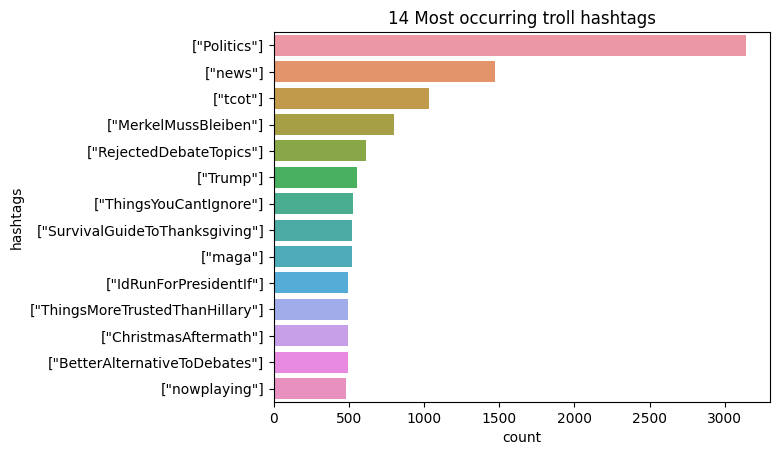

In [155]:
sns.barplot(data=most_occurring_hastgags, x="count", y="hashtags").set(title = "14 Most occurring troll hashtags")

## Histograms - users' accounts creation and tweet submissions

In [195]:
creation_data = tweets.sort_values("created_at", ascending = True).created_str.dropna().map(lambda x: x[0:7])

In [196]:
res = pd.DataFrame(pd.DataFrame(creation_data).groupby("created_str")["created_str"].count())

res.columns = ["count"]
res2 = res.reset_index()
res2

,created_str,count
0,2014-07,12
1,2014-08,1
2,2014-09,1
3,2014-11,388
4,2014-12,442
5,2015-01,2191
6,2015-02,2091
7,2015-03,2325
8,2015-04,2250
9,2015-05,1900


<AxesSubplot: title={'center': 'Number of troll posts on tweeter over time'}, xlabel='Year and Month', ylabel='Occurrences of troll posts'>

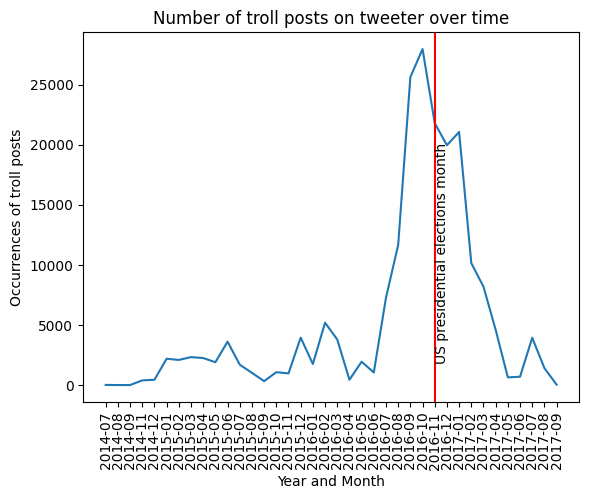

In [213]:
g = sns.lineplot(x="created_str", y="count", data=res2)
g.axvline("2016-11", color = "red")
g.set_title("Number of troll posts on tweeter over time")
g.set_xlabel("Year and Month")
g.set_ylabel("Occurrences of troll posts")
plt.text("2016-11",2000,'US presidential elections month',rotation=90)
plt.xticks(rotation=90)

g

In [47]:
np.unique(tweets["user_key"]).shape

(453,)

In [245]:
users.head(30)

,id,location,name,followers_count,statuses_count,time_zone,verified,lang,screen_name,description,created_at,favourites_count,friends_count,listed_count
0,1.003451e+08,still ⬆️Block⤵️Corner⬇️street,#Ezekiel2517✨...,1053.0,31858.0,NaN,False,en,SCOTTGOHARD,CELEBRITY TRAINER ✨#424W147th✨ #CrossfitCoach ...,Tue Dec 29 23:15:22 +0000 2009,2774.0,1055.0,35.0
1,2.471657e+08,"Chicago, IL",B E C K S T E R✨,650.0,6742.0,Mountain Time (US & Canada),False,en,Beckster319,Rebecca Lynn Hirschfeld Actress.Model.Writer.A...,Fri Feb 04 06:38:45 +0000 2011,7273.0,896.0,30.0
2,2.495389e+08,NaN,Chris Osborne,44.0,843.0,NaN,False,en,skatewake1994,NaN,Wed Feb 09 07:38:44 +0000 2011,227.0,154.0,1.0
3,4.496897e+08,NaN,Рамзан Кадыров,94773.0,10877.0,Moscow,False,ru,KadirovRussia,"Пародийный аккаунт. Озвучиваю то, что политика...",Thu Dec 29 11:31:09 +0000 2011,0.0,7.0,691.0
4,4.718689e+08,"Санкт-Петербург, Россия",Маргарита Саваж,23305.0,18401.0,Volgograd,False,ru,MargoSavazh,Честь имею. Нагло врать не умею.,Mon Jan 23 10:26:25 +0000 2012,1480.0,8021.0,231.0
5,1.039581e+09,Amerika,Dark Nally,22.0,22603.0,Jakarta,False,id,darknally,uptodate news!!!!,Thu Dec 27 13:06:58 +0000 2012,0.0,40.0,16.0
6,1.510489e+09,USA,Laila Heats,3080.0,2228.0,Eastern Time (US & Canada),False,en,lagonehoe,How can you judge me when you don’t know me?,Wed Jun 12 13:07:49 +0000 2013,3504.0,2369.0,12.0
7,1.513801e+09,USA,CC Jack,2760.0,2100.0,Eastern Time (US & Canada),False,en,YouJustCtrlC,ProBlack | Stoner | even jesus was stoned befo...,Thu Jun 13 16:07:23 +0000 2013,2744.0,2700.0,10.0
8,1.517679e+09,"Philadelphia, PA",Mr Moran,879.0,2044.0,Eastern Time (US & Canada),False,en,MrMoraan,I'm getting too cool for this social media shi...,Fri Jun 14 21:58:48 +0000 2013,2981.0,758.0,15.0
9,1.518857e+09,USA,Jonathon Norwood,789.0,2002.0,Eastern Time (US & Canada),False,en,NoJonathonNo,Strive not to be a success but rather to be of...,Sat Jun 15 08:47:02 +0000 2013,2170.0,440.0,8.0


In [8]:
users.shape

(453, 14)

In [223]:
creation_data = users.sort_values("id", ascending = True).created_at.dropna().map(lambda x: x[4:7] + x[26:])

In [224]:
creation_data

316    May2009
325    Nov2009
0      Dec2009
1      Feb2011
2      Feb2011
        ...   
367    Jul2016
365    Jul2016
382    Aug2016
376    Aug2016
357    Oct2016
Name: created_at, Length: 383, dtype: object

In [225]:
res = pd.DataFrame(pd.DataFrame(creation_data).groupby("created_at")["created_at"].count())

res.columns = ["count"]
res2 = res.reset_index()
res2

,created_at,count
0,Apr2014,12
1,Apr2016,6
2,Aug2013,94
3,Aug2014,7
4,Aug2015,1
5,Aug2016,2
6,Dec2009,1
7,Dec2011,1
8,Dec2012,1
9,Dec2013,1


In [237]:
res2["year"] = res2.created_at.map(lambda x: x[3:])
happy_map = {"Jan":1, "Feb": 2, "Mar": 3, "Apr":4, "May": 5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11,"Dec":12}
res2["month"] = res2.created_at.map(lambda x: x[0:3]).map(happy_map)
res2 = res2.sort_values(["year", "month"])

In [246]:
res2.tail(10)

,created_at,count,year,month
11,Dec2015,1,2015,12
17,Jan2016,2,2016,1
14,Feb2016,4,2016,2
28,Mar2016,1,2016,3
1,Apr2016,6,2016,4
31,May2016,3,2016,5
24,Jun2016,2,2016,6
20,Jul2016,18,2016,7
5,Aug2016,2,2016,8
36,Oct2016,1,2016,10


<AxesSubplot: title={'center': 'Dates of creation of troll accounts on tweeter over time'}, xlabel='Year and Month', ylabel='Occurrences of troll accounts creation'>

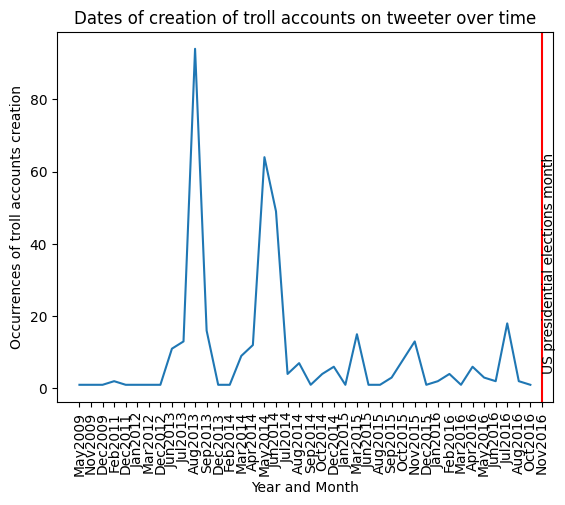

In [242]:
g = sns.lineplot(x="created_at", y="count", data=res2)
g.axvline("Nov2016", color = "red")
g.set_title("Dates of creation of troll accounts on tweeter over time")
g.set_xlabel("Year and Month")
g.set_ylabel("Occurrences of troll accounts creation")
plt.text("Nov2016",5,'US presidential elections month',rotation=90)
plt.xticks(rotation=90)

g

Many troll user accounts were created far before the elections day, but there was a pike in July 2016

## Analysis of retweet users network

In [131]:
idczek = tweets.retweeted_status_id.to_list()[4]
idczek

7.775914782060298e+17

In [133]:
idczek in tweets.tweet_id.to_list()

False

In [3]:
# tweet_id: user_id  map

mapp = tweets.loc[:, ["tweet_id", "user_key"]]
tweet_network = tweets.loc[:, ["user_key", "retweeted_status_id"] ]

tweet_network.columns = ["user_key", "tweet_id"]

In [137]:
tweet_network.head()

,user_key,tweet_id
0,kathiemrr,NaN
1,traceyhappymom,NaN
2,evewebster373,NaN
3,blacktolive,NaN
4,jacquelinisbest,7.775915e+17


In [138]:
mapp.head()

,tweet_id,user_key
0,8.362279e+17,kathiemrr
1,7.651989e+17,traceyhappymom
2,6.160023e+17,evewebster373
3,7.766933e+17,blacktolive
4,7.775946e+17,jacquelinisbest


In [4]:
aux = mapp.merge(tweet_network.dropna(), on='tweet_id', how='inner')

aux2 = aux.loc[:,["user_key_x", "user_key_y"]]

aux2.columns = ["Source", "Target"]

In [5]:
aux2

,Source,Target
0,trayneshacole,gloed_up
1,thefoundingson,thefoundingson
2,garrettsimpson_,heyits_toby
3,garrettsimpson_,emileewaren
4,patriotblake,heyits_toby
...,...,...
2623,traceyhappymom,jasper_fly
2624,traceyhappymom,cassieweltch
2625,ten_gop,kateritterrrr
2626,dominicvalent,puredavie


filtering the data because of computational complexity of calculating pagerank

In [123]:
aux3 = aux2.groupby("Target")["Target"].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)
aux3

,Target,count
51,giselleevns,238
89,melvinsroberts,111
114,rightnpr,84
112,realten_gop,84
52,gloed_up,80
107,puredavie,80
122,tpartynews,74
20,c__wells,69
59,hollandpatrickk,69
33,daileyjadon,68


In [124]:
# aux2.filter("Target" in aux3.Target.to_list())

aux4 = aux2.loc[aux2['Target'].apply(lambda x: x in aux3.Target.to_list())]

In [52]:
aux2.shape

(2628, 2)

In [125]:
aux4.shape

(957, 2)

In [128]:

class PageRankGraph:
    def __init__(self, G: nx.Graph, d:float=0.55, it:int =2000): # d = 0.55, an arbitrary hyperparameter
        self.d = d
        self.it = it
        self.G = G
        
        aux = nx.linalg.adjacency_matrix(G).todense()
        self.A = aux / aux.sum(axis=1)
        self.PR = np.ones(len(G.nodes)).reshape(1, -1)
    def update_pageRank(self):
        self.PR =  self.PR @ self.A
        self.PR = self.PR/self.PR.sum()
        self.PR = self.d/len(self.PR) + (1-self.d)*self.PR
    def get_pageRank(self):
        for i in range(self.it):
            self.update_pageRank()
        return np.array(self.PR).reshape(-1)

In [129]:
G = nx.from_pandas_edgelist(aux4, 'Source', 'Target', create_using=nx.MultiGraph())

In [130]:
pagerank = PageRankGraph(G).get_pageRank()
pagerank

C:\Users\patry\AppData\Local\Temp\ipykernel_11720\487801657.py:7: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  aux = nx.linalg.adjacency_matrix(G).todense()


array([0.55083905, 0.57292954, 0.62355548, 0.55010157, 0.65801091,
       0.55059256, 0.55656925, 0.55687509, 0.56992006, 0.55753233,
       0.55082336, 0.55020314, 0.55070257, 0.55016774, 0.59167697,
       0.55159783, 0.58672253, 0.55010772, 0.55009314, 0.62962528,
       0.5506857 , 0.55091107, 0.55106669, 0.56955401, 0.55010157,
       0.55010157, 0.55010772, 0.55111291, 0.55014013, 0.55058413,
       0.55027942, 0.55122768, 0.55049099, 0.55047413, 0.55010309,
       0.55010607, 0.5508809 , 0.55004472, 0.55120721, 0.55074512,
       0.55022362, 0.55054976, 0.55049942, 0.55117368, 0.55107696,
       0.55098276, 0.55002236, 0.55055017, 0.55076278, 0.55091349,
       0.55050786, 0.55050786, 0.55028785, 0.55037256, 0.55078727,
       0.55020314, 0.55006002, 0.55039785, 0.55010157, 0.55029628,
       0.55004666, 0.55007628, 0.55002236, 0.55018628, 0.55009314,
       0.55006002, 0.55006002, 0.55007006, 0.55010157, 0.55010157,
       0.55002236, 0.5500477 , 0.55002236, 0.55010157, 0.55004

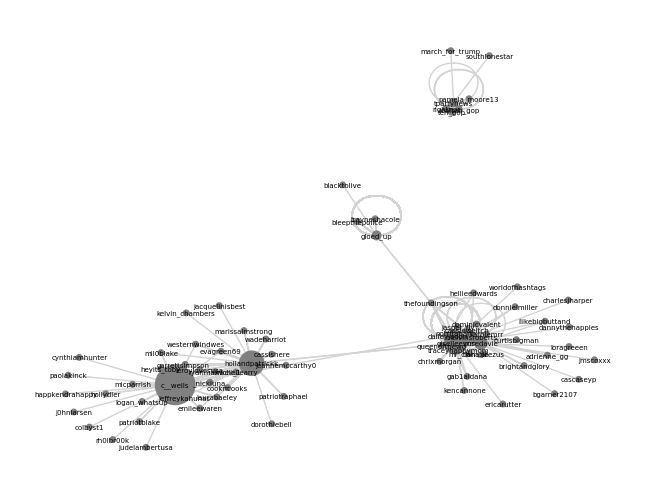

In [258]:
import matplotlib.pyplot as plt

nx.draw_spring(G, with_labels=True, node_size=(pagerank**22)*8000000, arrowsize = 0.02, font_size = 5, font_color = "black", node_color = "gray", edge_color = "lightgray")

There are **3** ( maybe 4) **discernible communities** if we take into account 10 the most retweeted user accounts.

It looks like there were in reality more than 1 troll writing troll posts on tweeter. But the number of trolls was not that high, they were usually creating an *artificial crowd*.

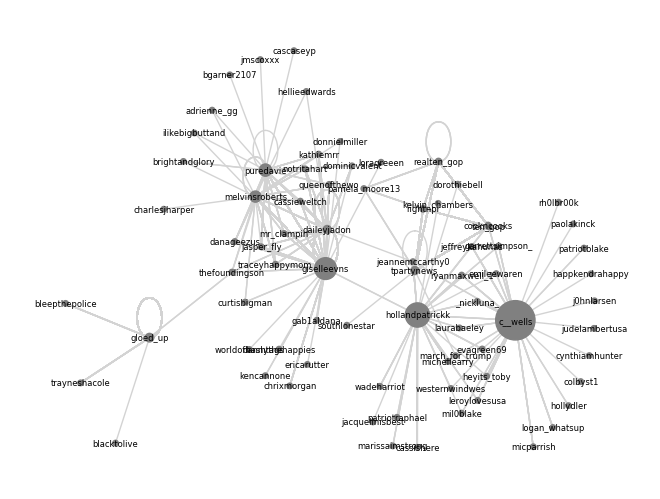

In [256]:
nx.draw_kamada_kawai(G, with_labels=True, node_size=(pagerank**22)*8000000, arrowsize = 0.02, font_size = 6, font_color = "black", node_color = "gray", edge_color = "lightgray")





**c_wells** is the user with the highest value of pagerank among all other troll users

#### P12.2 Your task is to prepare an infographics/presentation/report containing the most interesting conclusions from the analysis of the results of task P12.1. [6P]

(*Russian_trolls.pdf* presentation in this directory)